In [1]:
# imports from Qiskit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [3]:
# imports from backend providers (IBM for superconductor, AQT for trapped ion)
from qiskit.providers.ibmq import IBMQ
from qiskit.providers.aqt import AQT

#ibmq_provider2 = IBMQ.save_account('bffbca27fac5774039b3a51431b40220cee5f7b4e9586b61f8b90a83239a75f6e2e71445191c44b78db42dcec25f4a25b2fdbba1323c64dd44c99e015d6403d8')
ibmq_provider = IBMQ.load_account()        # credentials stored on disk
aqt_provider_simulators = AQT.enable_account('2633b2d14dae4d9da7c9df2503857334')  # simulator credentials
# aqt_provider_device = AQT.enable_account('INPUT DEVICE CREDENTIALS HERE') # hardware credentials

ibmq_simulator = ibmq_provider.get_backend('ibmq_qasm_simulator')
ibmq_device = ibmq_provider.get_backend('ibmq_burlington')
aqt_simulator = aqt_provider_simulators.get_backend('aqt_qasm_simulator')
# calling noisy simulator the 'device' for now
aqt_device = aqt_provider_simulators.get_backend('aqt_qasm_simulator_noise_1')

In [4]:
s = '11'
n = len(s)

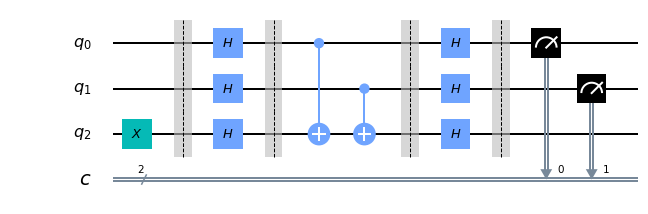

In [6]:
qc = QuantumCircuit(n+1,n)
qc.x(n)
qc.barrier()

qc.h(range(n+1))
qc.barrier()

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1':
        qc.cx(ii,n)

qc.barrier()
qc.h(range(n+1))

qc.barrier()
qc.measure(range(n),range(n))

qc.draw(output='mpl')

In [7]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Backend in use:  aqt_qasm_simulator


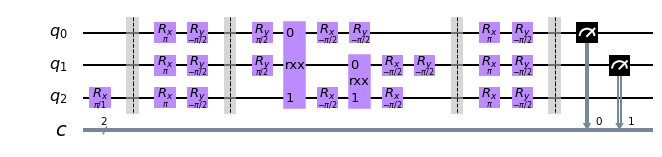

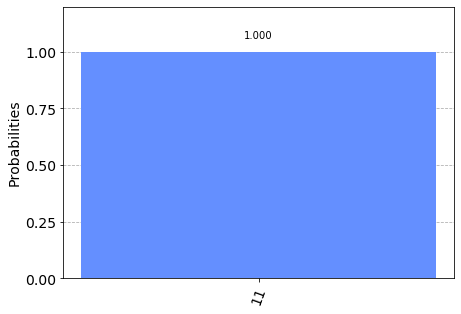

Done
Backend in use:  ibmq_qasm_simulator


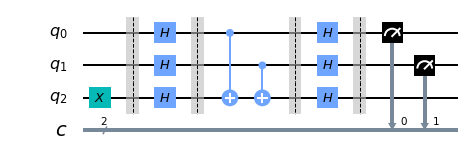

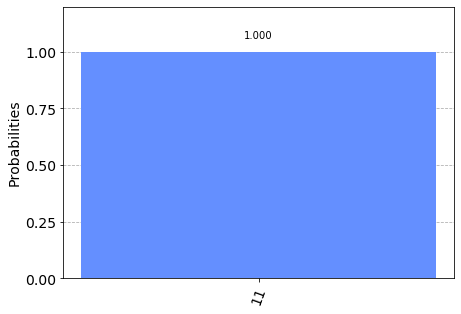

Done
Backend in use:  aqt_qasm_simulator_noise_1


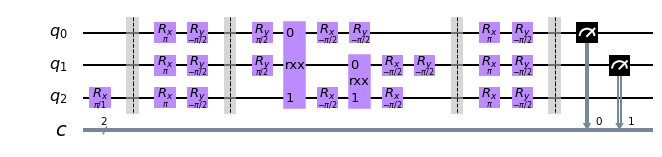

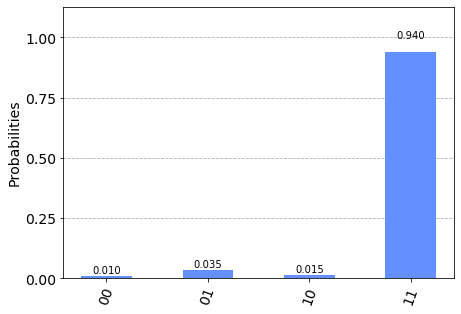

Done
Backend in use:  ibmq_burlington


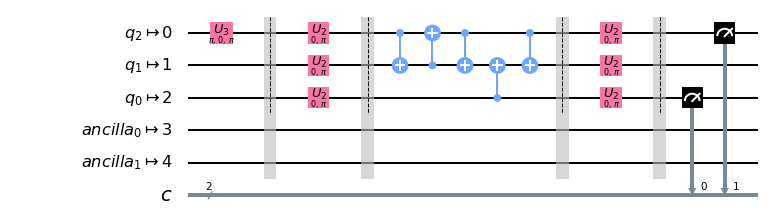

Job Status: job is queued (6)     

In [ ]:
# transpile, plot circuit, run, plot result
backends = [aqt_simulator, ibmq_simulator, aqt_device, ibmq_device]
for be in backends:
    print("Backend in use: ", be)
    new_qc = transpile(qc, be)
    new_qc.draw(output='mpl', scale=0.5)

    job = execute(new_qc, be, shots=200)
    if be == ibmq_device:
        job_monitor(job)
    counts = job.result().get_counts()
    plot_histogram(counts)
    print('Done')
    
    if be == aqt_simulator:
        aqt_sim_results = job.result()
        aqt_sim_counts = job.result().get_counts()
    if be == ibmq_simulator:
        ibmq_sim_results = job.result()
        ibmq_sim_counts = job.result().get_counts()
    if be == aqt_device:
        aqt_dev_results = job.result()
        aqt_dev_counts = job.result().get_counts()
    if be == ibmq_device:
        ibmq_dev_results = job.result()
        ibmq_dev_counts = job.result().get_counts()

In [ ]:
# plotting the results together
plot_histogram([aqt_sim_counts, ibmq_sim_counts, aqt_dev_counts, ibmq_dev_counts], 
               legend = ['AQT Simulator', 'IBMQ Simulator', 'AQT Device', 'IBMQ Device'],
               figsize = (15,10))

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table